# Data Analysis of  Home Health Care CAHPS Survey

##        [1]Descriptive Analysis


## [2]Choropleth(Map)

## [3]Tendency Analysis

<img src="IMG/line.jpg">

<img src="IMG/line.jpg">

<img src="IMG/line.jpg">

# 1) Import  Libraries


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.tools as tls
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
tls.set_credentials_file(username="LibardoMunoz",api_key="l3g2FTXhyP1hPPu0oU10")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# 2) Load Datasets, datacleaning and visualization

## 2.1) HHCAHPS_PRVDR

### 2.1.1) Cleaning and first Insight

In [2]:
HHCAHPS_PRVDR=pd.read_csv('HHCAHPS_PRVDR.csv',encoding = "ISO-8859-1")
HHCAHPS_PRVDR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11801 entries, 0 to 11800
Data columns (total 39 columns):
State                                                                                                                              11801 non-null object
CMS Certification Number (CCN)                                                                                                     11801 non-null int64
Provider Name                                                                                                                      11801 non-null object
Address                                                                                                                            11801 non-null object
City                                                                                                                               11801 non-null object
Zip                                                                                                                            

In [3]:
HHCAHPS_PRVDR=pd.read_csv('HHCAHPS_PRVDR.csv',encoding = "ISO-8859-1")
HHCAHPS_PRVDR=HHCAHPS_PRVDR.drop(HHCAHPS_PRVDR.columns[[1,3,5,6,14,16,18,20,22,24,26,28,30,32,34,36,38]],1)
HHCAHPS_PRVDR.replace('Not Available',np.nan, inplace=True)
HHCAHPS_PRVDR=HHCAHPS_PRVDR.iloc[:,:].apply(pd.to_numeric, errors='ignore')
HHCAHPS_PRVDR.head(2)

,State,Provider Name,City,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Response rate
0,AL,BUREAU OF HOME & COMMUNITY SERVICES ...,MONTGOMERY,Official Health Agency,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,JEFFERSON COUNTY HOME CARE ...,BESSEMER,Official Health Agency,Yes,Yes,Yes,Yes,Yes,Yes,4.0,4.0,91.0,4.0,89.0,5.0,88.0,2.0,87.0,81.0,44.0,19.0


### 2.1.2) Visualizing Ordinal data

In [4]:
@interact(select=({'Mean': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").mean().plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )',
                   'Min': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").min().plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )',
                   'Max': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").max().plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )',
                   'Var': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").var().plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )',
                   'Skew': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").skew().plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )',
                   'kurt': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").apply(pd.DataFrame.kurt).plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )',
                   'Std ': 'HHCAHPS_PRVDR.iloc[:,[0,10,11,13,15]].groupby("State").std().plot(kind="bar",legend="reverse", subplots=True,figsize=(10,15) )'}))
def plot(select):
    exec(select)
    #df.groupby('a').apply(pd.DataFrame.kurt)

A Jupyter Widget

In [5]:
x=[0,12,14,16,18,19,20,21]
figure_size=(20,15)
@interact(select=({'Mean': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").mean().plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size)',
                   'Min': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").min().plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size )',
                   'Max': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").max().plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size )',
                   'Var': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").var().plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size )',
                   'Skew': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").skew().plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size )',
                   'kurt': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").apply(pd.DataFrame.kurt).plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size )',
                   'Std ': 'HHCAHPS_PRVDR.iloc[:,x].groupby("State").std().plot(kind="bar",legend="reverse", subplots=True,figsize=figure_size )'}))
def plot(select):
    exec(select)
    #df.groupby('a').apply(pd.DataFrame.kurt)

A Jupyter Widget

### 2.1.3) Visualizing Categorical Data


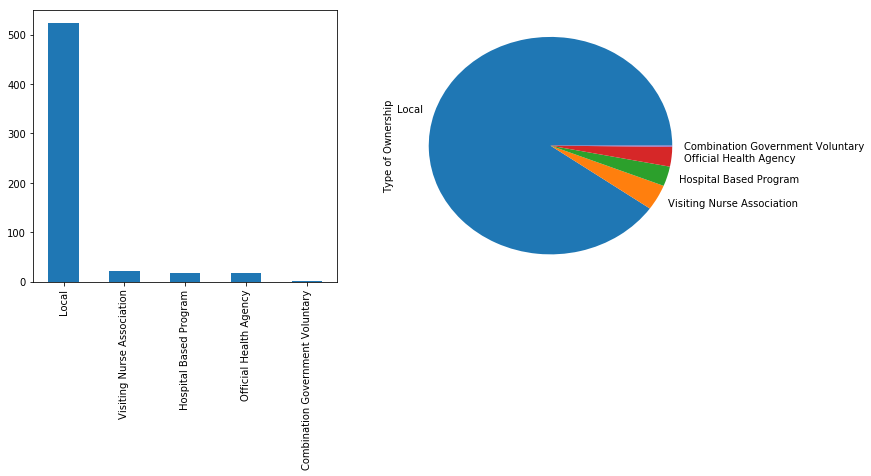

In [6]:
size=(12,5)
categorical=[0,3,4,5,6,7,8,9]
estado="MI"
columna="Type of Ownership"
fig, axes = plt.subplots(nrows=1, ncols=2)



HHCAHPS_PRVDR.iloc[:,categorical][HHCAHPS_PRVDR.State==estado][columna].value_counts().plot(kind="bar",ax=axes[0],figsize=size )
HHCAHPS_PRVDR.iloc[:,categorical][HHCAHPS_PRVDR.State==estado][columna].value_counts().plot(kind="pie",ax=axes[1],figsize=size )

In [11]:
size=(5,10)
categorical=[0,3,4,5,6,7,8,9]
states_names=HHCAHPS_STATE.iloc[:,0].values
states_names

@interact(Services=['Type of Ownership',
                  'Offers Nursing Care Services',
                  'Offers Physical Therapy Services',
                  'Offers Speech Pathology Services',
                  'Offers Medical Social Services',
                  'Offers Home Health Aide Services'
                 ],State=(states_names)
          )

def plot(Services,State):
    fig, axes = plt.subplots(nrows=2, ncols=1)
    fig.tight_layout() 
    plt.subplots_adjust( left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6 )




    HHCAHPS_PRVDR.iloc[:,categorical][HHCAHPS_PRVDR.State==State][Services].value_counts().plot(kind="bar",ax=axes[0],figsize=size )
    HHCAHPS_PRVDR.iloc[:,categorical][HHCAHPS_PRVDR.State==State][Services].value_counts().plot(kind="pie",ax=axes[1],figsize=size )
    #df.groupby('a').apply(pd.DataFrame.kurt)

A Jupyter Widget

In [12]:
HHCAHPS_PRVDR.head(2)

,State,Provider Name,City,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Response rate
0,AL,BUREAU OF HOME & COMMUNITY SERVICES ...,MONTGOMERY,Official Health Agency,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,JEFFERSON COUNTY HOME CARE ...,BESSEMER,Official Health Agency,Yes,Yes,Yes,Yes,Yes,Yes,4.0,4.0,91.0,4.0,89.0,5.0,88.0,2.0,87.0,81.0,44.0,19.0


### 2.1.4) Best/Worst 5 Providers by State


In [13]:
HHCAHPS_PRVDR.head(2)

,State,Provider Name,City,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,HHCAHPS Survey Summary Star Rating,Star Rating for health team gave care in a professional way,Percent of patients who reported that their home health team gave care in a professional way,Star Rating for health team communicated well with them,Percent of patients who reported that their home health team communicated well with them,"Star Rating team discussed medicines, pain, and home safety","Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Star Rating for how patients rated overall care from agency,Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Response rate
0,AL,BUREAU OF HOME & COMMUNITY SERVICES ...,MONTGOMERY,Official Health Agency,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,JEFFERSON COUNTY HOME CARE ...,BESSEMER,Official Health Agency,Yes,Yes,Yes,Yes,Yes,Yes,4.0,4.0,91.0,4.0,89.0,5.0,88.0,2.0,87.0,81.0,44.0,19.0


### The Best Five

In [14]:
@interact(Report=['Percent of patients who reported that their home health team gave care in a professional way',
                  'Percent of patients who reported that their home health team communicated well with them',
                  'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
                  'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
                  'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family',
                  'Number of completed Surveys',
                  'Response rate'
                 ],State=(states_names)
          )

def plot(Report,State):
    #[HHCAHPS_PRVDR.State==State]
    #percent="Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)"
    valores=HHCAHPS_PRVDR[HHCAHPS_PRVDR.State==State].sort_values(by=[Report], ascending=False).iloc[0:5,1].values
    print("5 ",valores[4])
    print("4 ",valores[3])
    print("3 ",valores[2])
    print("2 ",valores[1])
    print("1 ",valores[0])

A Jupyter Widget

### The Worst Five

In [15]:
@interact(Report=['Percent of patients who reported that their home health team gave care in a professional way',
                  'Percent of patients who reported that their home health team communicated well with them',
                  'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
                  'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
                  'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family',
                  'Number of completed Surveys',
                  'Response rate'
                 ],State=(states_names)
          )

def plot(Report,State):
    #[HHCAHPS_PRVDR.State==State]
    #percent="Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)"
    valores=HHCAHPS_PRVDR[HHCAHPS_PRVDR.State==State].sort_values(by=[Report], ascending=True).iloc[0:5,1].values
    print("5 ",valores[4])
    print("4 ",valores[3])
    print("3 ",valores[2])
    print("2 ",valores[1])
    print("1 ",valores[0])

A Jupyter Widget

## 2.2) Load Datasets HHCAHPS_STATE

In [16]:
HHCAHPS_STATE=pd.read_csv('HHCAHPS_STATE.csv',encoding = "ISO-8859-1")

In [17]:
states_names=HHCAHPS_STATE.iloc[:,0].values
states_names


array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC',
       'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [18]:
@interact(select=({'Percent of patients who reported that their home health team gave care in a professional way': 1,
                   'Percent of patients who reported that their home health team communicated well with them': 2,
                   'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them':3,
                   'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)':4,
                   'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':5}))
def fcolumna(select):
    dataState =[dict(type='choropleth', autocolorscale=False, locations=HHCAHPS_STATE['State'],z=HHCAHPS_STATE.iloc[:,select], locationmode='USA-states',
               text=None,colorscale='custom-colorscale',colorbar=dict(title="%"))]

    layoutState= dict(title='Report By State', 
                 geo=dict(scope='usa', projection=dict(type='albers usa'), showlakes=True, lakecolor='rgb(66,165,245)',),)

    fig=dict(data=dataState, layout=layoutState)
   

    return  py.iplot(fig,filename='HHCAHPS_STATE')

A Jupyter Widget

In [19]:
HHCAHPS_STATE.head(2)

,State,Percent of patients who reported that their home health team gave care in a professional way,Percent of patients who reported that their home health team communicated well with them,"Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family",Number of completed Surveys,Response rate
0,AK,89,84,84,85,82,NaN,NaN
1,AL,92,89,88,89,84,NaN,NaN


In [20]:
HHCAHPS_STATE=HHCAHPS_STATE.drop(HHCAHPS_STATE.columns[[6,7]],1)
HHCAHPS_STATE.replace('Not Available',np.nan, inplace=True)
HHCAHPS_STATE=HHCAHPS_STATE.iloc[:,:].apply(pd.to_numeric, errors='ignore')

In [40]:
HHCAHPS_STATE.head(13)

,State,Percent of patients who reported that their home health team gave care in a professional way,Percent of patients who reported that their home health team communicated well with them,"Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them",Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),"Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family"
0,AK,89,84,84,85,82
1,AL,92,89,88,89,84
2,AR,91,88,86,87,83
3,AZ,86,83,79,81,74
4,CA,86,83,82,80,74
5,CO,88,85,82,83,78
6,CT,86,84,83,82,77
7,DC,81,74,70,70,59
8,DE,88,84,82,82,77
9,FL,88,85,81,84,79


In [21]:
target='State'
features = ['Percent of patients who reported that their home health team communicated well with them',
            'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
            'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
            'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family']

X = HHCAHPS_STATE.loc[:, features].values
y = HHCAHPS_STATE.loc[:,target].values

X = StandardScaler().fit_transform(X)

/home/libardomm/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [23]:
principalDf.head()

,principal component 1,principal component 2
0,-0.502204,-0.214989
1,-2.729470,0.526634
2,-1.874391,0.288714
3,1.863450,-0.327797
4,1.502384,0.527540


In [24]:
finalDf = pd.concat([principalDf, HHCAHPS_STATE[[target]]], axis = 1)

In [25]:
finalDf.head()

,principal component 1,principal component 2,State
0,-0.502204,-0.214989,AK
1,-2.729470,0.526634,AL
2,-1.874391,0.288714,AR
3,1.863450,-0.327797,AZ
4,1.502384,0.527540,CA


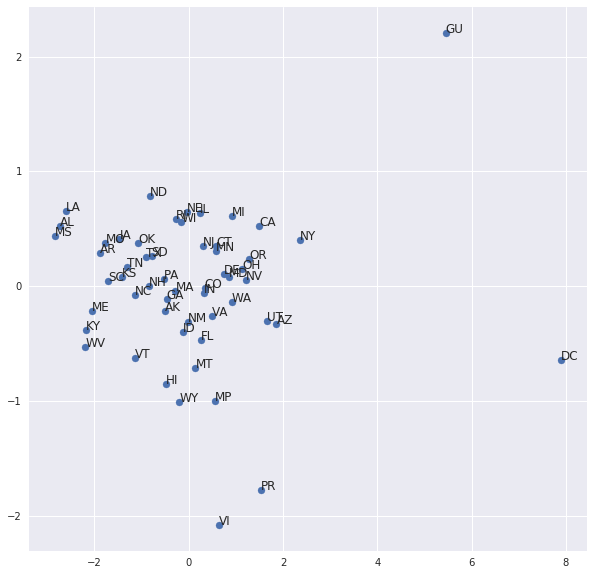

In [252]:

y=finalDf['principal component 2']
z=finalDf['principal component 1']
n=states_names

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

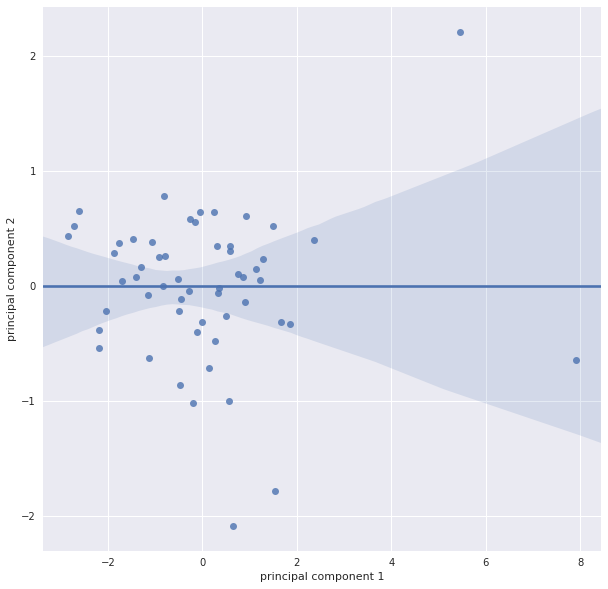

In [34]:
## import seaborn as sns
sns.set(color_codes=True)
tips = finalDf
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = sns.regplot(x="principal component 1", y="principal component 2", data=tips)
